# **Previs√£o de Aluguel com Regress√£o Polinomial**

Neste estudo montaremos um modelo de regress√£o polinomial utilizando a variavel Valor Condominio para prever a variavel valor aluguel. Nessa atividade voc√™s devem escolher outra v√°riavel dessa base para realizar a previs√£o do valor do aluguel.


# 1 - Realize a importa√ß√£o das bibliotecas necess√°rias, carrega a base de dados e separe em X e Y, selecionando uma das v√°riaveis para X n√£o sendo a usada durante a aula.

- Importa√ß√£o de Bibliotecas necess√°rias:

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df_imoveis = pd.read_csv("ALUGUEL_MOD12.csv", delimiter=';')

In [3]:
df_imoveis

Valor_Aluguel  Valor_Condominio  Metragem  N_Quartos  N_banheiros  \
0               480               295        48          2            2   
1               500                 0        50          1            2   
2               500                 0        40          1            2   
3               500                36        45          1            2   
4               500                 0        30          1            1   
...             ...               ...       ...        ...          ...   
7198          25000              7500       627          4            5   
7199          25000              4600       364          4            2   
7200          25000              3700       266          3            4   
7201          25000              6000       600          4            5   
7202          25000              1587       248          4            3   

      N_Suites  N_Vagas  
0            1        1  
1            1        1  
2            1        1  
3            1        0  
4            0        0  
...        ...      ...  
7198         4        6  
7199         1        0  
7200         3        7  
7201         4        8  
7202         2        4  

[7203 rows x 7 columns]

- Verifica√ß√£o de correla√ß√£o entre as variav√©s:
Vou fazer isso pra ajudar na minha decis√£o de uso de vari√°vel x para o estudo.

                  Valor_Aluguel  Valor_Condominio  Metragem  N_Quartos  \
Valor_Aluguel          1.000000          0.695302  0.730591   0.413139   
Valor_Condominio       0.695302          1.000000  0.805926   0.497420   
Metragem               0.730591          0.805926  1.000000   0.678091   
N_Quartos              0.413139          0.497420  0.678091   1.000000   
N_banheiros            0.603715          0.585795  0.687558   0.553807   
N_Suites               0.614397          0.589244  0.696281   0.540887   
N_Vagas                0.652858          0.690993  0.743872   0.591224   

                  N_banheiros  N_Suites   N_Vagas  
Valor_Aluguel        0.603715  0.614397  0.652858  
Valor_Condominio     0.585795  0.589244  0.690993  
Metragem             0.687558  0.696281  0.743872  
N_Quartos            0.553807  0.540887  0.591224  
N_banheiros          1.000000  0.920149  0.694983  
N_Suites             0.920149  1.000000  0.712054  
N_Vagas              0.694983  0.712054  1.

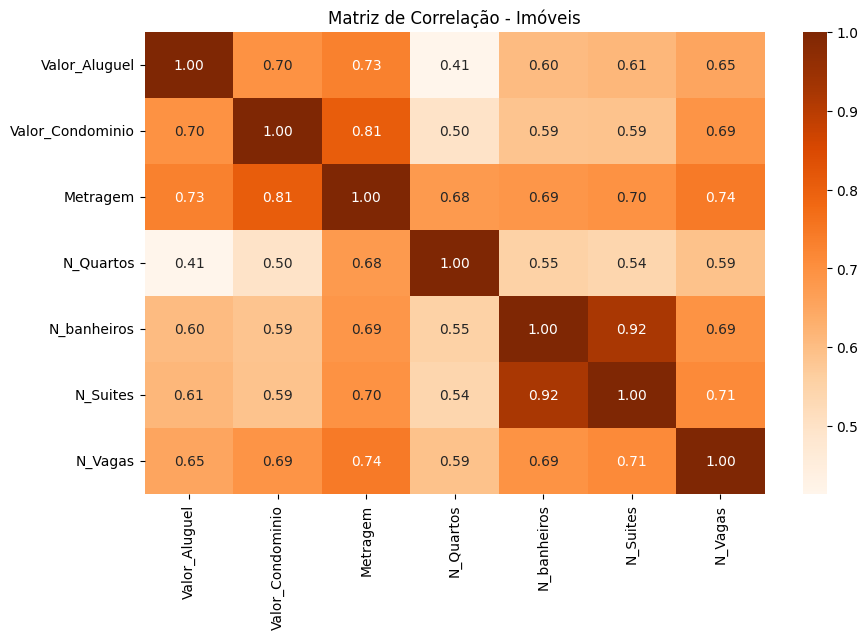

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Correla√ß√£o
correlacao = df_imoveis.corr(numeric_only=True)

# Mostrar a matriz de correla√ß√£o
print(correlacao)

# -------------------------------
# Heatmap
# -------------------------------
plt.figure(figsize=(10,6))
sns.heatmap(correlacao, annot=True, cmap="Oranges", fmt=".2f")
plt.title("Matriz de Correla√ß√£o - Im√≥veis")
plt.show()

**Insigth:**
Vou usar Metragem X Valor do Aluguel
Se relacionam em 0.73 - Maior valor de correla√ß√£o.

- Separa√ß√£o da Variavel X.


In [5]:
y = df_imoveis['Valor_Aluguel']

In [6]:
X = df_imoveis[['Metragem']]

# 2 - Fa√ßa o procecssamento dos dados utilizando o Polynomial Feature, com degree = 2.

In [7]:
poly_features = PolynomialFeatures(degree=2)

# 3 - Separe os dados em treino e teste e realize o treinamento do modelo.

In [8]:
x_poly = poly_features.fit_transform(X)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=0)

In [10]:
print("Tamanho de x_test:", x_test.shape)
print("Tamanho de y_test:", y_test.shape)

Tamanho de x_test: (1441, 3)
Tamanho de y_test: (1441,)


**Insigth:** Verificando o tamanho das vari√°veis.

4 - Fa√ßa as previs√µes para a base de teste e avalie os resultados obtidos, n√£o se esque√ßa de plotar o gr√°fico da regress√£o.

In [11]:
# Regress√£o linear nos dados transformados
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


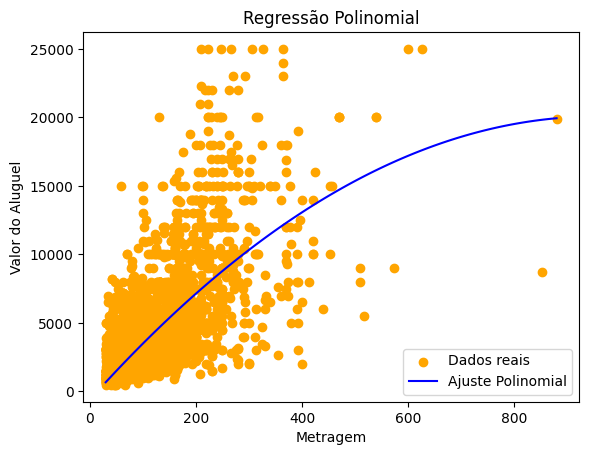

In [12]:
y_pred = model.predict(x_test)

# Visualiza√ß√£o
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
x_range_poly = poly_features.transform(x_range)
y_range_pred = model.predict(x_range_poly)

plt.scatter(X, y, color='orange', label='Dados reais')  # Dados reais
plt.plot(x_range, y_range_pred, color='blue', label='Ajuste Polinomial')  # Linha do ajuste
plt.xlabel('Metragem')
plt.ylabel('Valor do Aluguel')
plt.title('Regress√£o Polinomial')
plt.legend()
plt.show()

- Resultados:

In [13]:
r2 = r2_score(y_test, y_pred)
print(f'R¬≤ da Regress√£o Polinomial: {r2:.4f}')

R¬≤ da Regress√£o Polinomial: 0.5423


**Insigth:** Em compara√ß√£o ao valor obtido com o c√°lculo do R2 ( Valor do Aluguel X Valor do condominio) Para alpha=2; R2 aqui apresentou um valor superior do que o R2 do primeiro estudo com a feauture 'valor de condominio'. Possivelmente porque a correla√ß√£o de Valor de Condominio se relaciona melhor com a metragem do que com o valor de condominio.

# 5 - Refa√ßa os passos anteriores, rodando um novo modelo, por√©m testando agora na fase de processamento o degree = 4. Avalie se o resultado desse novo modelo est√° superior ao anterior.

In [14]:
poly_features = PolynomialFeatures(degree=4)

In [15]:
x_poly = poly_features.fit_transform(X)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=0)

In [17]:
# Regress√£o linear nos dados transformados
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


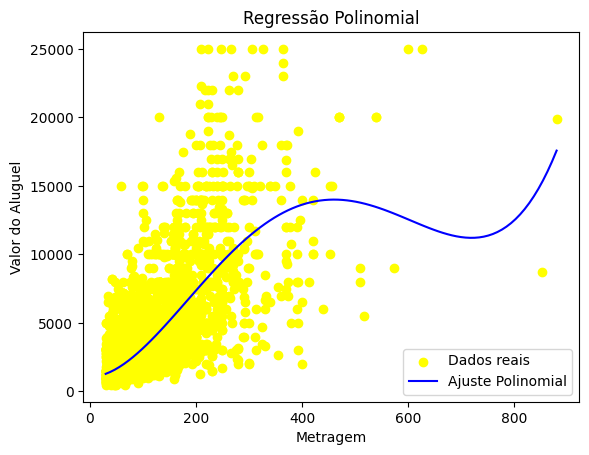

In [18]:
y_pred = model.predict(x_test)

# Visualiza√ß√£o
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
x_range_poly = poly_features.transform(x_range)
y_range_pred = model.predict(x_range_poly)

plt.scatter(X, y, color='yellow', label='Dados reais')  # Dados reais
plt.plot(x_range, y_range_pred, color='blue', label='Ajuste Polinomial')  # Linha do ajuste
plt.xlabel('Metragem')
plt.ylabel('Valor do Aluguel')
plt.title('Regress√£o Polinomial')
plt.legend()
plt.show()

- Resultados:

In [19]:
r2 = r2_score(y_test, y_pred)
print(f'R¬≤ da Regress√£o Polinomial: {r2:.4f}')

R¬≤ da Regress√£o Polinomial: 0.5596


**Insigth:** Valor superior do que com o alpha=2.

- Busca por outros melhores parametros para alpha (GRID SEARCH):

Melhor grau de polin√¥mio: 2


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


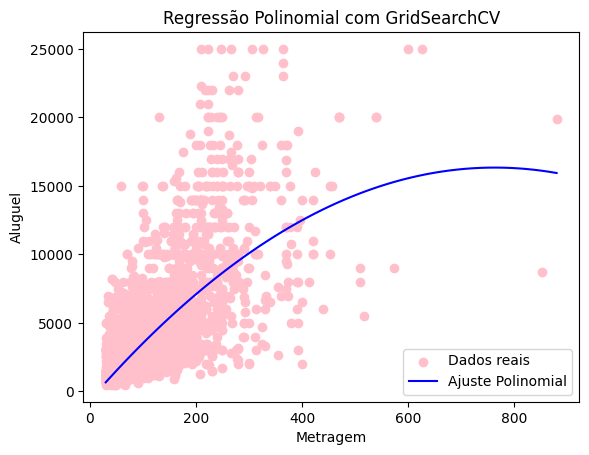

In [20]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Leitura de Dados
df_imoveis = pd.read_csv("ALUGUEL_MOD12.csv", delimiter=';')
X = df_imoveis[['Metragem']]  # vari√°vel independente
y = df_imoveis['Valor_Aluguel']     # vari√°vel alvo

#Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Regress√£o Polinomial
pipeline = Pipeline([
    ("poly", PolynomialFeatures()),
    ("model", LinearRegression())
])

# -------------------------------
# Definir par√¢metros para GridSearch
# -------------------------------
param_grid = {
    "poly__degree": [1, 2, 3, 4, 5]
}

grid = GridSearchCV(pipeline, param_grid, cv=5, scoring="neg_mean_squared_error")
grid.fit(X_train, y_train)

# -------------------------------
# Melhor modelo
# -------------------------------
print("Melhor grau de polin√¥mio:", grid.best_params_["poly__degree"])

best_model = grid.best_estimator_

# -------------------------------
# Previs√µes
# -------------------------------
y_pred = best_model.predict(X_test)

# Criar sequ√™ncia de valores X para suaviza√ß√£o
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
y_range_pred = best_model.predict(x_range)

# -------------------------------
# Visualiza√ß√£o
# -------------------------------
plt.scatter(X, y, color='pink', label='Dados reais')
plt.plot(x_range, y_range_pred, color='blue', label='Ajuste Polinomial')
plt.xlabel('Metragem')
plt.ylabel('Aluguel')
plt.title('Regress√£o Polinomial com GridSearchCV')
plt.legend()
plt.show()


**- Insigth:**

Surpreendente!
Eu fiz o uso do GridSC s√≥ para de fato verificar qual seria o melhor grau!
E o resultado foi esse! De que apesar dos valores de R2 superiores o alpha=2 √© o melhor valor.

 Mesmo que o grau 4 tenha se sa√≠do melhor em um teste isolado, a m√©dia do CV pode mostrar que grau 2 √© mais consistente e generaliza melhor.

Grau 4 ‚Üí pode ser overfitting: ajusta melhor aos dados de treino/teste mas generaliza pior.

Grau 2 ‚Üí pode ter menor erro m√©dio em CV, mesmo que pare√ßa "menos ajustado" visualmente, √© mais est√°vel para novos dados.

üí° Resumo:

Resultados manuais em um √∫nico split podem enganar, mostrando que graus maiores s√£o melhores.

GridSearchCV com valida√ß√£o cruzada te d√° uma vis√£o mais confi√°vel do desempenho m√©dio, evitando overfitting.

**### Exemplo para gerar DataFrame dos coeficientes:**

In [21]:
import pandas as pd

# Pegar o PolynomialFeatures do melhor modelo
poly = best_model.named_steps["poly"]
model = best_model.named_steps["model"]

# Obter nomes das features polinomiais
feature_names = poly.get_feature_names_out(X.columns)

# Criar DataFrame com coeficientes
coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coeficiente": model.coef_.round(4)
})

# Adicionar intercepto
intercept_df = pd.DataFrame({
    "Feature": ["Intercepto"],
    "Coeficiente": [model.intercept_.round(4)]
})

# Concatenar intercepto + coeficientes
coef_df = pd.concat([intercept_df, coef_df], ignore_index=True)

print(coef_df)


      Feature  Coeficiente
0  Intercepto    -640.9544
1           1       0.0000
2    Metragem      44.4883
3  Metragem^2      -0.0291


In [22]:
from sklearn.metrics import mean_squared_error, r2_score

# Lista para guardar resultados
results = []

for degree in param_grid["poly__degree"]:
    # Monta pipeline para cada grau
    pipeline = Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("model", LinearRegression())
    ])

    # Treina
    pipeline.fit(X_train, y_train)

    # Faz previs√µes no teste
    y_pred_test = pipeline.predict(X_test)

    # Calcula m√©tricas
    r2 = r2_score(y_test, y_pred_test)
    mse = mean_squared_error(y_test, y_pred_test)

    # Salva resultados
    results.append({
        "Grau": degree,
        "R¬≤": round(r2, 4),
        "MSE": round(mse, 2)
    })

# Converte em DataFrame para visualiza√ß√£o
df_results = pd.DataFrame(results)
print(df_results)


   Grau      R¬≤         MSE
0     1  0.5668  4110266.52
1     2  0.5690  4089456.67
2     3  0.5612  4163420.51
3     4  0.5678  4100144.22
4     5  0.5726  4054647.42


**Insight / Resumo para TCC:**

O grau 1 (linear) j√° apresenta um R¬≤ em torno de 0,56, ou seja, o modelo consegue explicar cerca de 56% da varia√ß√£o no valor do aluguel a partir da metragem.

O aumento do grau n√£o trouxe ganhos expressivos: grau 2 e 4 ficam praticamente no mesmo n√≠vel do linear.

O melhor desempenho foi obtido com o grau 5, que alcan√ßou R¬≤ = 0,5726 e o menor MSE = 4.054.647, mas a melhora em rela√ß√£o ao linear √© muito pequena.

Isso indica que modelos polinomiais mais complexos n√£o geram benef√≠cios significativos nesse caso. A rela√ß√£o entre metragem e valor do aluguel √© quase linear, com apenas pequenas varia√ß√µes n√£o capturadas.

Portanto, o modelo linear simples (grau 1) j√° seria suficiente, visto que o aumento da complexidade n√£o melhora substancialmente o ajuste.

‚ÄúA avalia√ß√£o dos diferentes graus de polin√¥mio mostrou que o modelo linear (grau 1) j√° explica aproximadamente 56% da varia√ß√£o nos valores de aluguel. Embora o grau 5 tenha apresentado o maior R¬≤ (0,5726) e o menor MSE (4.054.647), a diferen√ßa em rela√ß√£o ao modelo linear √© m√≠nima. Isso sugere que a rela√ß√£o entre metragem e valor de aluguel √© predominantemente linear, e que o uso de modelos polinomiais mais complexos n√£o traz ganhos significativos de desempenho.‚Äù

# 6 - Explique com suas palavras o conceito e a diferen√ßa entre Elastic Net, Ridge e Lasso.
Minimo: 4 linhas.

Explica√ß√£o de tipo para uma crian√ßa de 5 anos, bem simples e divertida, sobre Ridge, Lasso e Elastic Net:

- Ridge (regress√£o L2)! **A Tia bacaneesima!**

Um monte de brinquedos espalhados e queremos colocar todos arrumadinhos na prateleira, mas sem jogar nenhum fora.

Ridge diz: ‚ÄúTudo bem, todos os brinquedos ficam, s√≥ que vou apertar um pouquinho cada um pra n√£o bagun√ßar a prateleira.‚Äù

No ML: Ridge reduz os pesos das vari√°veis grandes, mas n√£o zera nenhuma.

- Lasso (regress√£o L1)! **A M√£e Consciente!**

Agora imagine a mesma prateleira de brinquedos, mas vamos deixar s√≥ os mais importantes, porque a prateleira √© pequena.

Lasso diz: ‚ÄúAlguns brinquedos eu vou tirar completamente, outros ficam.‚Äù

No ML: Lasso pode zerar totalmente alguns coeficientes, ajudando a escolher s√≥ as vari√°veis mais importantes.

- Elastic Net! **Passeio com a M√£e e a Tia!**

Elastic Net √© tipo um mix de Ridge + Lasso:

‚ÄúVamos apertar todos os brinquedos um pouquinho e tirar alguns que n√£o s√£o t√£o importantes.‚Äù

No ML: combina L1 e L2, pegando o melhor dos dois mundos: redu√ß√£o de pesos e sele√ß√£o de vari√°veis.